### Name : Ashwin Chafale
### Github unsername : chafale
### USC-ID : 1990624801

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

(a) Download the Combined Cycle Power Plant data1 from:
https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

(b) Exploring the data:
i. How many rows are in this data set? How many columns? What do the rows
and columns represent?

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
print("AT represent : Ambient Temperature")
print("V represent : Exhaust Vacuum")
print("AP represent : Ambient Pressure")
print("RH represent : Relative Humidity")
print("PE represent : Energy Output")
df.tail()

AT represent : Ambient Temperature
V represent : Exhaust Vacuum
AP represent : Ambient Pressure
RH represent : Relative Humidity
PE represent : Energy Output


,AT,V,AP,RH,PE
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [3]:
df.shape

(9568, 5)

(b) iii. What are the mean, the median, range,  rst and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


(b) ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

In [5]:
# sb.set_style(style="whitegrid")
# sb.pairplot(df, hue="PE")

(c) For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks?

In [6]:
# simple linear regression
model = smf.ols('PE~AT', df).fit()
# getting intercept parameters
b0 = model.params[0]
b1 = model.params[1]
print("Coefficient : [ B0 = {}, B1 = {}]".format(b0, b1))
model.summary()

Coefficient : [ B0 = 497.034119892767, B1 = -2.1713199585178047]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:32   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.000     496.727     497.341
AT            -2.1713      0.007   -291.715      0.000      -2.186      -2.157
==============================================================================
Omnibus:                      417.457   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.844
Skew:                          -0.209   Prob(JB):                    1.83e-243
Kurtosis:                       4.621   Cond. No.                         59.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[ -2.17131996 497.03411989]


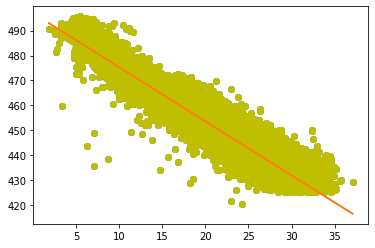

In [7]:
# at vs pe
x = np.array(df.AT)
y = np.array(df.PE)
plt.plot(x, y, 'o')
coef = np.polyfit(x, y, 1)
print(coef)
poly1d_fn = np.poly1d(coef)

plt.plot(x,y, 'yo', x, poly1d_fn(x))

In [8]:
# simple linear regression
model = smf.ols('PE~V', df).fit()
# getting intercept parameters
b0 = model.params[0]
b1 = model.params[1]
print("Coefficient : [ B0 = {}, B1 = {}]".format(b0, b1))
model.summary()

Coefficient : [ B0 = 517.801526308386, B1 = -1.1681351265557107]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:33   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.000     517.061     518.542
V             -1.1681      0.007   -172.402      0.000      -1.181      -1.155
==============================================================================
Omnibus:                       77.693   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.571
Skew:                          -0.097   Prob(JB):                     1.61e-24
Kurtosis:                       3.487   Cond. No.                         245.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

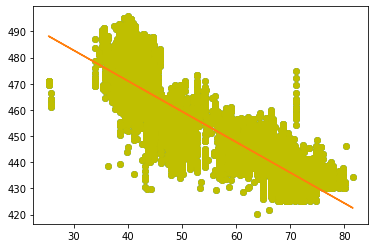

In [9]:
# v vs pe
x = np.array(df.V)
y = np.array(df.PE)
plt.plot(x, y, 'o')
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(x, y, 'yo', x, poly1d_fn(x))

In [10]:
# simple linear regression
model = smf.ols('PE~AP', df).fit()
# getting intercept parameters
b0 = model.params[0]
b1 = model.params[1]
print("Coefficient : [ B0 = {}, B1 = {}]".format(b0, b1))
model.summary()

Coefficient : [ B0 = -1055.260988984437, B1 = 1.4898716733991129]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:33   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
AP             1.4899      0.025     59.296      0.000       1.441       1.539
==============================================================================
Omnibus:                      525.438   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.290
Skew:                           0.616   Prob(JB):                    1.10e-133
Kurtosis:                       2.859   Cond. No.                     1.73e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

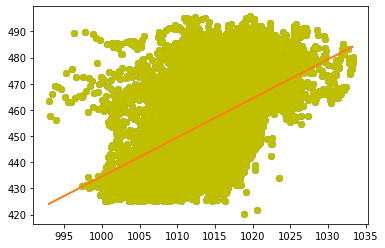

In [11]:
# ap vs pe
x = np.array(df.AP)
y = np.array(df.PE)
plt.plot(x, y, 'o')
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(x,y, 'yo', x, poly1d_fn(x))

In [12]:
# simple linear regression
model = smf.ols('PE~RH', df).fit()
# getting intercept parameters
b0 = model.params[0]
b1 = model.params[1]
print("Coefficient : [ B0 = {}, B1 = {}]".format(b0, b1))
model.summary()

Coefficient : [ B0 = 420.96176615548404, B1 = 0.45565010226298014]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:33   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.000     419.349     422.574
RH             0.4557      0.011     41.399      0.000       0.434       0.477
==============================================================================
Omnibus:                      772.278   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              319.245
Skew:                           0.231   Prob(JB):                     4.75e-70
Kurtosis:                       2.234   Cond. No.                         383.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

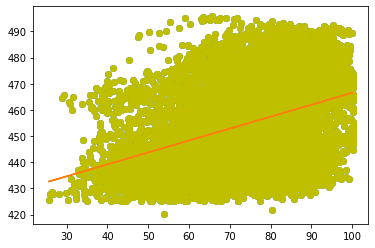

In [13]:
# rh vs pe
x = np.array(df.RH)
y = np.array(df.PE)
plt.plot(x, y, 'o')
coef = np.polyfit(x, y, 1)
poly1d_fn = np.poly1d(coef)

plt.plot(x,y, 'yo', x, poly1d_fn(x))

(d) Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : Bj = 0?

In [14]:
# multi linear regression
model = smf.ols('PE~AT+V+AP+RH', df).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:33   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.000     435.500     473.718
AT            -1.9775      0.015   -129.342      0.000      -2.007      -1.948
V             -0.2339      0.007    -32.122      0.000      -0.248      -0.220
AP             0.0621      0.009      6.564      0.000       0.044       0.081
RH            -0.1581      0.004    -37.918      0.000      -0.166      -0.150
==============================================================================
Omnibus:                      892.002   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.777
Skew:                          -0.352   Prob(JB):                         0.00
Kurtosis:                       6.123   Cond. No.                     2.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(e) How do your results from 1c compare to your results from 1d? Create a plot
displaying the uni-variate regression coefficient from 1c on the x-axis, and the
multiple regression coefficient from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis.

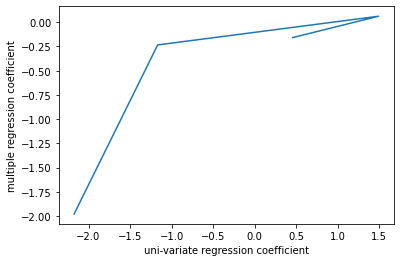

In [16]:
uni_var_coefficient = [-2.173, -1.1681, 1.4899, 0.4557]
multi_regress_coeff = [-1.9775, -0.2339, 0.0621, -0.1581]
plt.plot(uni_var_coefficient, multi_regress_coeff)
plt.xlabel('uni-variate regression coefficient')
plt.ylabel('multiple regression coefficient')
plt.show()

(f) Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form2
Y = B0 + B1.X + B2.X^2 +   B3.X^3 + E

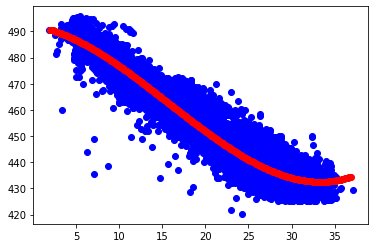

In [17]:
# Polynomial Regression
df2 = pd.DataFrame()
df2['AT'], df2['PE'] = df.AT, df.PE

X_train, X_test, y_train, y_test = train_test_split(df2.AT, df2.PE)

X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

poly = PolynomialFeatures(degree=3)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_

plt.scatter(df.AT, df.PE, color="b")

x_axis = np.arange(2, 37, 0.1)
response = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis**2 + coefficient[3] * x_axis**3

plt.scatter(x_axis, response, color='r')
plt.show()

In [18]:
prediction = model.predict(X_test_poly)
r2_score(prediction, y_test)

0.9031399993991943

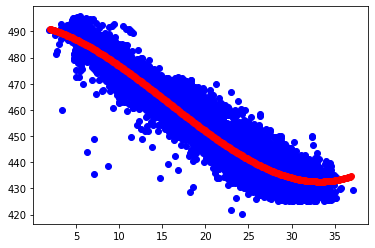

R^2 =  0.9030699952008159


In [19]:
# Polynomial Regression
df2 = pd.DataFrame()
df2['AT'], df2['PE'] = df.AT, df.PE

X_train, X_test, y_train, y_test = train_test_split(df2.AT, df2.PE)

X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

poly = PolynomialFeatures(degree=3)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_

plt.scatter(df.AT, df.PE, color="b")

x_axis = np.arange(2, 37, 0.1)
response = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis ** 2 + coefficient[3] * x_axis ** 3

plt.scatter(x_axis, response, color='r')
plt.show()

prediction = model.predict(X_test_poly)
print("R^2 = ", r2_score(prediction, y_test))

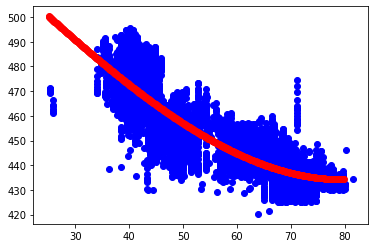

R^2 =  0.7042613962462998


In [20]:
df2 = pd.DataFrame()
df2['V'], df2['PE'] = df.V, df.PE

X_train, X_test, y_train, y_test = train_test_split(df2.V, df2.PE)

X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

poly = PolynomialFeatures(degree=3)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_

plt.scatter(df.V, df.PE, color="b")

x_axis = np.arange(25, 80, 0.1)
response = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis ** 2 + coefficient[3] * x_axis ** 3

plt.scatter(x_axis, response, color='r')
plt.show()

prediction = model.predict(X_test_poly)
print("R^2 = ", r2_score(prediction, y_test))

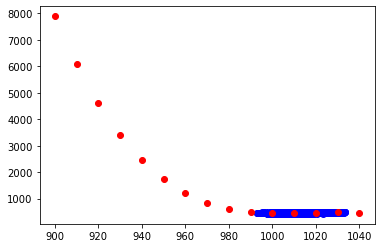

R^2 =  -1.4752043443820697


In [21]:
df2 = pd.DataFrame()
df2['AP'], df2['PE'] = df.AP, df.PE

X_train, X_test, y_train, y_test = train_test_split(df2.AP, df2.PE)

X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

poly = PolynomialFeatures(degree=3)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_

plt.scatter(df.AP, df.PE, color="b")

x_axis = np.arange(900, 1050, 10)
response = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis ** 2 + coefficient[3] * x_axis ** 3

plt.scatter(x_axis, response, color='r')
plt.show()

prediction = model.predict(X_test_poly)
print("R^2 = ", r2_score(prediction, y_test))

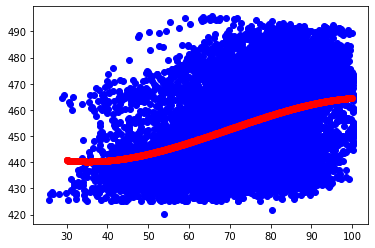

R^2 =  -4.359300718729684


In [22]:
df2 = pd.DataFrame()
df2['RH'], df2['PE'] = df.RH, df.PE

X_train, X_test, y_train, y_test = train_test_split(df2.RH, df2.PE)

X_train_df, X_test_df = pd.DataFrame(X_train), pd.DataFrame(X_test)

poly = PolynomialFeatures(degree=3)
X_train_poly, X_test_poly = poly.fit_transform(X_train_df), poly.fit_transform(X_test_df)

model = linear_model.LinearRegression()
model = model.fit(X_train_poly, y_train)
coefficient = model.coef_
intercept = model.intercept_

plt.scatter(df.RH, df.PE, color="b")

x_axis = np.arange(30, 100, 0.1)
response = intercept + coefficient[1] * x_axis + coefficient[2] * x_axis ** 2 + coefficient[3] * x_axis ** 3

plt.scatter(x_axis, response, color='r')
plt.show()

prediction = model.predict(X_test_poly)
print("R^2 = ", r2_score(prediction, y_test))

(g) Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant.

In [23]:
model = smf.ols('PE~AT + V + AP + RH + (AT*V) + (AT*AP) + (AT*RH) + (V*AP) + (V*RH) + (AP*RH)', df).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 11 Feb 2022   Prob (F-statistic):               0.00
Time:                        23:21:34   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.000     531.631     839.934
AT            -4.3470      2.373     -1.832      0.067      -8.999       0.305
V             -7.6749      1.351     -5.682      0.000     -10.323      -5.027
AP            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
RH             1.5709      0.773      2.031      0.042       0.055       3.087
AT:V           0.0210      0.001     23.338      0.000       0.019       0.023
AT:AP          0.0018      0.002      0.752      0.452      -0.003       0.006
AT:RH         -0.0052      0.001     -6.444      0.000      -0.007      -0.004
V:AP           0.0068      0.001      5.135      0.000       0.004       0.009
V:RH           0.0008      0.000      1.716      0.086      -0.000       0.002
AP:RH         -0.0016      0.001     -2.125      0.034      -0.003      -0.000
==============================================================================
Omnibus:                     1454.609   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9170.848
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       7.657   Cond. No.                     1.70e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic non-linearity,
and remove insignificant variables using p-values (be careful about interaction
terms). Test both models on the remaining points and report your train and test
MSEs.

In [42]:
from sklearn.metrics import mean_squared_error, r2_score
X = df[['AT', 'V', 'AP', 'RH']]
y = df.PE
# train , test = train_test_split(df, test_size = 0.3)
# # lr = LinearRegression()
# # model = lr.fit(train[['AT', 'V', 'AP', 'RH']], train['PE'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# lr = LinearRegression()
# reg = lr.fit([X_train], y_train)
#
# predictions = reg.predict(y_test)
# # model = sm.OLS(y_train, X_train)
# # results = model.fit()
#
# print("MSE = ", mean_squared_error(y_test,predictions))
# print("R squared = ", r2_score(y_test, predictions))
[X_train]

[         AT      V       AP     RH
 6699  28.86  73.18  1012.46  68.80
 8470  20.96  69.48  1011.04  82.63
 8432  27.23  44.05  1005.69  58.91
 2198  25.37  66.75  1017.94  79.26
 2249  31.68  73.68  1014.85  64.00
 ...     ...    ...      ...    ...
 2895  26.92  62.44  1011.09  70.80
 7813  20.90  67.71  1007.16  59.02
 905   18.59  39.54  1008.56  68.61
 5192  22.96  45.01  1012.21  50.81
 235   20.50  49.69  1009.60  70.81
 
 [6697 rows x 4 columns]]

(i) KNN Regression:
i. Perform k-nearest neighbor regression for this dataset using both normalized
and raw features. Find the value of k 2 f1; 2; : : : ; 100g that gives you the
best fit. Plot the train and test errors in terms of 1=k.

In [26]:
# KNN Regression using normalized

In [44]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn import preprocessing
X = df[['AT', 'V', 'AP', 'RH']]
y = df.PE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)
knn = KNeighborsRegressor(n_neighbors=10)
y_pred = cross_val_predict(knn, X, y, cv=5)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
print("MSE = ", mean_squared_error(y,y_pred))
print("R^2 = ", r2_score(y,y_pred))

MSE =  16.199925614025922
R^2 =  0.944378295873567


In [46]:
error = []
min_error = float("inf")
min_k = 0
for k in range(1,100):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    curr_error = mean_squared_error(y,y_pred)
    error.append(curr_error)
    if curr_error < min_error:
        min_error = curr_error
        min_k = k

print("Min k = ", min_k)

Min k =  5


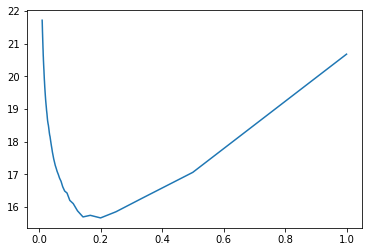

In [47]:
plt.plot([1/k for k in range(1,100)], error)

5
MSE =  15.726819842563568


ValueError: x and y must have same first dimension, but have shapes (99,) and (1,)

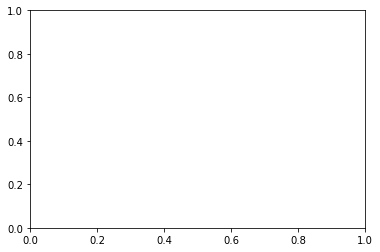

In [59]:
# KNN Regression using raw data
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = df[['AT', 'V', 'AP', 'RH']]
y = df.PE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsRegressor(n_neighbors=10)

error = []
min_error = float("inf")
min_k = 0
for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred=knn.predict(X_test)
    curr_error = mean_squared_error(y_test, y_pred)
    error.append(curr_error)
    if curr_error < min_error:
        min_error = curr_error
        min_k = k

knn = KNeighborsRegressor(n_neighbors=min_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
curr_error = mean_squared_error(y_test,y_pred)

print(min_k)
print("MSE = ", curr_error)
# plt.plot([1 / k for k in range(1, 100)], curr_error)

(j) Compare the results of KNN Regression with the linear regression model that has
the smallest test error and provide your analysis.

__3.__
ISLR 2.4.7
__(a)__
The Euclidean distance is the straight line distance between two points. This can be calculated using the Pythagorean theorem.

For 3D space we have:

  $$d(p,q) = \sqrt{(p_1-q_1)^2 + (p_2-q_2)^2 + (p_3-q_3)^2}$$
Using the above formula, we get the following distances:


$$
\begin {aligned}
d(1,test) &= 3\\
d(2,test) &= 2\\
d(3,test) &= 3.16\\
d(4,test) &= 2.24\\
d(5,test) &= 1.41\\
d(6,test) &= 1.73\\
\end {aligned}
$$


__(b)__

  - **Green**; as nearest single observation is green.

__(c)__

  - **Red**; as nearest three observations are green, red and red.The probability of the test point belonging to red is 2/3 and green is 1/3. Therefore, the prediction is red.

__(d)__

 - For highly non-linear boundaries, we would expect the best value of K to be small. Smaller values of K result in a more flexible KNN model, and this will produce a decision boundary that is non-linear. A larger K would mean more data points are considered by the KNN model and this means its decision boundary is closer to a linear shape.